## Mounting Google Drive !

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/spotify-music-dataset'

artists.csv  dict_artists.json	tracks.csv


## Importing Libraries !

In [ ]:
# Base libraries
import time
import datetime
import os
import json

# Scientific libraries
import numpy as np
import pandas as pd

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Helper libraries
import warnings
warnings.filterwarnings('ignore')

# Seed value for numpy.random
np.random.seed(42)

## Reading the dataset

* artists = Contains data of all the artists with their followers, genres, name, popularity

* tracks = Contains data of all the tracks such as release_date, energy, dancebility and more!

* artist_dict = Contains the mapping of the artists to all their songs

In [ ]:
artists_df = pd.read_csv('/content/drive/MyDrive/TourismBERT/Spotify/artists.csv')
tracks_df = pd.read_csv('/content/drive/MyDrive/TourismBERT/Spotify/tracks.csv')
# with open('/content/drive/MyDrive/TourismBERT/Spotify/dict_artists.json') as json_data:
#     data = json.load(json_data)

### Exploring Artists

In [ ]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162095 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [ ]:

artists_df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:

# Dropping genres since high skewness towards null values
artists_df['genres'].value_counts()

[]                                                                                                                   856500
['background piano']                                                                                                    307
['calming instrumental']                                                                                                256
['background music']                                                                                                    247
['russelater']                                                                                                          226
                                                                                                                      ...  
['christian hip hop', 'christian pop', 'christian trap', 'miami hip hop', 'rap cristiano']                                1
['edm', 'moldovan pop', 'pop dance', 'progressive house', 'progressive trance', 'trance', 'uplifting trance']             1
['comic'

In [ ]:
artists_df.rename(columns = {'id': 'id_artists','popularity': 'artists_popularity'}, inplace = True)
artists_df.drop(['genres','name'],axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Here we scale the popularity and followers of an artist

# Initialize the Min-Max scaler
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()

# Fit and transform the scaler on the training data
artists_df['artists_popularity'] = minMaxScaler.fit_transform(artists_df[['artists_popularity']])
artists_df['followers'] = minMaxScaler.fit_transform(artists_df[['followers']])

In [ ]:
artists_df.sort_values(by='followers',ascending=False).head(10)

,id_artists,followers,artists_popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,1.000000,0.92
144485,66CXWjxzNUsdJxJ2JdwvnR,0.776943,0.95
313676,3TVXtAsR1Inumwj472S9r4,0.689691,0.98
144481,1uNFoZAHBGtllmzznpCI3s,0.565359,1.00
144488,7dGJo4pcD2V6oG8kP0tJRR,0.554470,0.94
313508,5pKCCKE2ajJHZ9KAiaK11H,0.535410,0.92
126658,6qqNVTkY8uBg9cP3Jd7DAH,0.529689,0.92
126338,06HL4z0CvFAxyc27GXpf02,0.492637,0.98
126339,53XhwfbYqKCa1cC15pYq2q,0.426688,0.89
144496,1dfeR4HaWDbWqFHLkxsg1d,0.424375,0.89


### Exploring Tracks

In [ ]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
# Extracting artitst id from ['artist_id'] -> string
tracks_df['id_artists'] = [i[2:-2] for i in tracks_df['id_artists']]

# Extracting year from release_date
tracks_df['release_year'] = [int(i.split('-')[0]) for i in tracks_df['release_date']]

In [ ]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [ ]:
# Fit and transform the scaler on the training data
tracks_df['loudness'] = minMaxScaler.fit_transform(tracks_df[['loudness']])
tracks_df['tempo'] = minMaxScaler.fit_transform(tracks_df[['tempo']])

In [ ]:
tracks_df = tracks_df.merge(artists_df, on = 'id_artists')


In [ ]:
tracks_df.drop(['id','id_artists','artists','name'], axis = 1, inplace = True)

In [ ]:
tracks_df

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,followers,artists_popularity
0,6,126903,0,1922-02-22,0.645,0.44500,0,0.713748,1,0.4510,0.674,0.744000,0.1510,0.127,0.425564,3,1922,1.153355e-06,0.04
1,0,157333,0,1922-02-22,0.298,0.46000,1,0.632572,1,0.4530,0.521,0.856000,0.4360,0.402,0.356850,4,1922,1.153355e-06,0.04
2,0,87040,0,1922-02-22,0.634,0.00399,5,0.459297,0,0.0377,0.926,0.919000,0.1050,0.396,0.324274,4,1922,1.153355e-06,0.04
3,0,40000,0,1922-02-22,0.657,0.32500,10,0.698743,0,0.2540,0.199,0.856000,0.0931,0.105,0.332591,5,1922,1.153355e-06,0.04
4,0,104400,0,1922-02-22,0.644,0.68400,7,0.791621,1,0.1990,0.144,0.802000,0.0847,0.138,0.406001,4,1922,1.153355e-06,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,50,265846,0,2020-02-25,0.528,0.67300,4,0.862105,1,0.0314,0.143,0.000000,0.0989,0.297,0.527906,4,2020,1.177436e-05,0.36
470034,67,82500,0,2020-10-30,0.609,0.01720,8,0.480712,1,0.1180,0.996,0.973000,0.1080,0.890,0.278508,4,2020,2.915074e-07,0.52
470035,66,185250,0,2020-03-20,0.562,0.03310,1,0.526936,1,0.1030,0.996,0.961000,0.1110,0.386,0.258526,3,2020,1.153355e-06,0.55
470036,50,258267,0,2020-09-26,0.560,0.51800,0,0.803491,0,0.0292,0.785,0.000000,0.0648,0.211,0.535333,4,2020,1.135611e-05,0.38


In [ ]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,followers,artists_popularity
count,470038.000000,4.700380e+05,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000
mean,28.392524,2.267375e+05,0.034987,0.565913,0.555447,5.223099,0.766583,0.664434,0.100757,0.429147,0.093756,0.213999,0.564334,0.483910,3.879657,1988.854688,0.013498,0.503105
std,17.494863,1.147592e+05,0.183746,0.159077,0.244112,3.520338,0.070648,0.472189,0.178089,0.339304,0.241880,0.185237,0.252629,0.120564,0.456678,21.278759,0.048812,0.196889
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000
25%,15.000000,1.756470e+05,0.000000,0.460000,0.367000,2.000000,0.726735,0.000000,0.033200,0.088800,0.000000,0.098000,0.361000,0.391106,4.000000,1976.000000,0.000164,0.380000
50%,28.000000,2.147870e+05,0.000000,0.577000,0.560000,5.000000,0.778007,1.000000,0.042800,0.394000,0.000019,0.139000,0.576000,0.479099,4.000000,1992.000000,0.001191,0.520000
75%,41.000000,2.615162e+05,0.000000,0.682000,0.755000,8.000000,0.818787,1.000000,0.071300,0.746000,0.005120,0.278000,0.778000,0.557241,4.000000,2006.000000,0.007545,0.650000
max,99.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,1.000000,1.000000,0.969000,0.996000,1.000000,1.000000,1.000000,1.000000,5.000000,2021.000000,1.000000,1.000000


### Correlation

<Axes: >

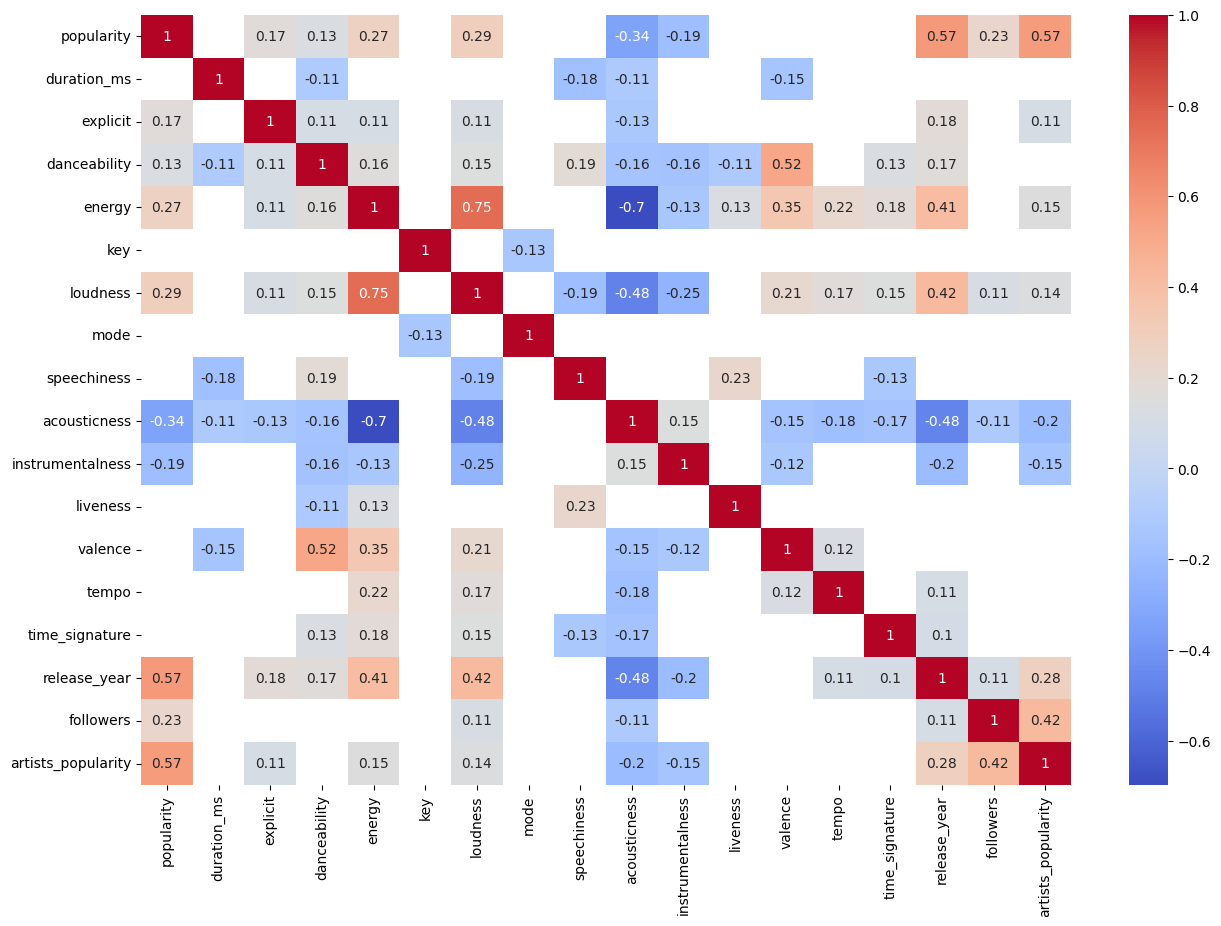

In [ ]:
corr = tracks_df.corr()
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')

## Feature Selection via Correlation

In [ ]:
#tracks_df = tracks_df.query('release_year >= 2008')
#tracks_df = tracks_df.query('popularity!=0')
tracks_df['popularity'] = minMaxScaler.fit_transform(tracks_df[['popularity']])
tracks_df

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,followers,artists_popularity
0,0.060606,126903,0,1922-02-22,0.645,0.44500,0,0.713748,1,0.4510,0.674,0.744000,0.1510,0.127,0.425564,3,1922,1.153355e-06,0.04
1,0.000000,157333,0,1922-02-22,0.298,0.46000,1,0.632572,1,0.4530,0.521,0.856000,0.4360,0.402,0.356850,4,1922,1.153355e-06,0.04
2,0.000000,87040,0,1922-02-22,0.634,0.00399,5,0.459297,0,0.0377,0.926,0.919000,0.1050,0.396,0.324274,4,1922,1.153355e-06,0.04
3,0.000000,40000,0,1922-02-22,0.657,0.32500,10,0.698743,0,0.2540,0.199,0.856000,0.0931,0.105,0.332591,5,1922,1.153355e-06,0.04
4,0.000000,104400,0,1922-02-22,0.644,0.68400,7,0.791621,1,0.1990,0.144,0.802000,0.0847,0.138,0.406001,4,1922,1.153355e-06,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,0.505051,265846,0,2020-02-25,0.528,0.67300,4,0.862105,1,0.0314,0.143,0.000000,0.0989,0.297,0.527906,4,2020,1.177436e-05,0.36
470034,0.676768,82500,0,2020-10-30,0.609,0.01720,8,0.480712,1,0.1180,0.996,0.973000,0.1080,0.890,0.278508,4,2020,2.915074e-07,0.52
470035,0.666667,185250,0,2020-03-20,0.562,0.03310,1,0.526936,1,0.1030,0.996,0.961000,0.1110,0.386,0.258526,3,2020,1.153355e-06,0.55
470036,0.505051,258267,0,2020-09-26,0.560,0.51800,0,0.803491,0,0.0292,0.785,0.000000,0.0648,0.211,0.535333,4,2020,1.135611e-05,0.38


## Testing a decision tree regressor!

In [ ]:
tracks_df['popularity'].sort_values().value_counts()

0.000000    26500
0.353535    10783
0.232323    10487
0.363636    10382
0.272727     9936
            ...  
0.939394        1
0.959596        1
0.969697        1
0.989899        1
1.000000        1
Name: popularity, Length: 100, dtype: int64

In [ ]:
features_columns = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]

X = tracks_df.drop(['popularity','release_date'],axis = 1)
y = tracks_df['popularity']

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestRegressor

dataframe = tracks_df
features = features_columns
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=420) # 70% training and 30% test


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
clf = LGBMRegressor(learning_rate = 0.2, max_depth = 5,n_estimators=200)
clf.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2312
[LightGBM] [Info] Number of data points in the train set: 263221, number of used features: 12
[LightGBM] [Info] Start training from score 0.286445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

LGBMRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)

In [ ]:
y_pred = clf.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

array([0.04547277, 0.02884688, 0.04260674, ..., 0.04260904, 0.06127853,
       0.05443316])

In [ ]:
shah_obj = explainer(X_train)

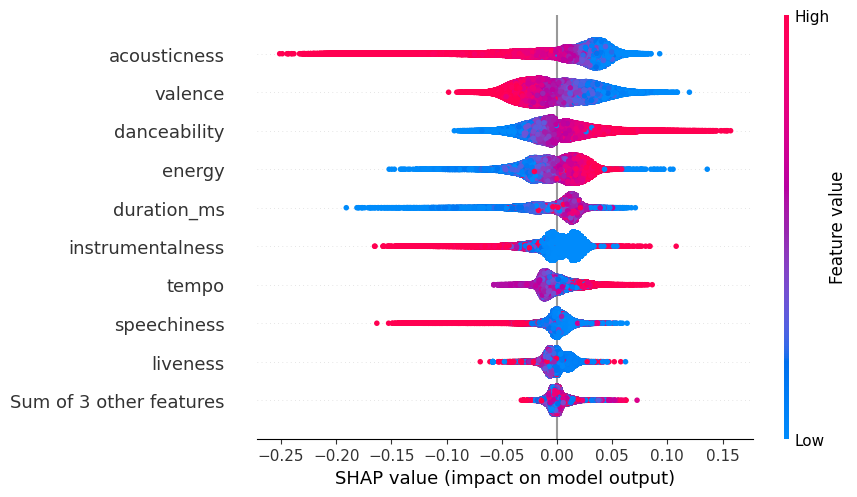

In [ ]:
shap.plots.beeswarm(shah_obj, show=False)
plt.savefig("/content/drive/MyDrive/TourismBERT/Spotify/shap.png")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2:.2f}")

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance:.2f}")

Mean Absolute Error: 0.12
Mean Squared Error: 0.02
Root Mean Squared Error: 0.15
R-squared (R^2): 0.28
Explained Variance Score: 0.28


In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np

# Load a sample dataset (Diabetes dataset for demonstration)
# data = load_diabetes()
# X = data.data
# y = data.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    # SVR(),
    DecisionTreeRegressor(),
    # RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=1000),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(silent=True)
]

# Fit each model and evaluate
# for model in models:
#     model.fit(X_train, y_train)
#     model_name = model.__class__.__name__
#     predictions = model.predict(X_test)

#     mse = mean_squared_error(y_test, predictions)
#     rmse = np.sqrt(mse)  # Calculating RMSE from MSE
#     mae = mean_absolute_error(y_test, predictions)
#     r2 = r2_score(y_test, predictions)

#     print(f"Metrics for {model_name}:")
#     print(f"MSE: {mse:.4f}")
#     print(f"RMSE: {rmse:.4f}")
#     print(f"MAE: {mae:.4f}")
#     print(f"R^2 score: {r2:.4f}")
#     print("-------------------------------")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


In [ ]:
X_train.shape

(263221, 12)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# X, y = load_iris(return_X_y=True)
# X.shape
X_train_new = SelectKBest(f_classif, k=2).fit_transform(X_train, y_train)
X_train_new.shape

(263221, 2)

#Getting the hyperparameter grids

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),

]




for model in models:
  hyperparameters = model.get_params()
  print(str(model),hyperparameters)
#   param_grid = {
#     'copy_X': [True,False],
#     'fit_intercept': [True,False],
#     'n_jobs': [-1,1]
#     # Add other hyperparameters and their values
# }

#   # Create a GridSearchCV object
#   grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

#   # Fit the grid search to the data
#   grid_search.fit(X_train, y_train)

#   # Get the best hyperparameters from the grid search
#   best_params = grid_search.best_params_
#   print("\nBest Hyperparameters:")
#   print(best_params)

#   # Get the best model from the grid search
#   best_model = grid_search.best_estimator_

#   # Now you can use the best model for predictions on new data
#   predictions = best_model.predict(X_test)
#   mse = mean_squared_error(y_test, predictions)
#   rmse = np.sqrt(mse)  # Calculating RMSE from MSE
#   mae = mean_absolute_error(y_test, predictions)
#   r2 = r2_score(y_test, predictions)

#   print(f"Metrics for {model}:")
#   print(f"MSE: {mse:.4f}")
#   print(f"RMSE: {rmse:.4f}")
#   print(f"MAE: {mae:.4f}")
#   print(f"R^2 score: {r2:.4f}")
#   print("-------------------------------")


NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

regression_model = LinearRegression()
linear_hyperparameters = regression_model.get_params()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1]
    # Add other hyperparameters and their values
}
grid_search = RandomizedSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions on new data

predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Metrics for {regression_model}:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 score: {r2:.4f}")
print("-------------------------------")


Best Hyperparameters:
{'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
Metrics for LinearRegression():
MSE: 0.0257
RMSE: 0.1603
MAE: 0.1300
R^2 score: 0.1765
-------------------------------


In [ ]:
from sklearn.linear_model import Ridge

regression_model = Ridge()
ridge_hyperparameters = regression_model.get_params()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Example values, you may adjust
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky']
    # Add other hyperparameters and their values
}

grid_search = GridSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions on new data

predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Metrics for {regression_model}:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 score: {r2:.4f}")
print("-------------------------------")


Best Hyperparameters:
{'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto'}
Metrics for Ridge():
MSE: 0.0257
RMSE: 0.1603
MAE: 0.1300
R^2 score: 0.1765
-------------------------------


In [ ]:
from sklearn.linear_model import Lasso

regression_model = Lasso()
lasso_hyperparameters = regression_model.get_params()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Example values, you may adjust
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
    # Add other hyperparameters and their values
}
grid_search = RandomizedSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions on new data

predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Metrics for {regression_model}:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 score: {r2:.4f}")
print("-------------------------------")


Best Hyperparameters:
{'selection': 'random', 'fit_intercept': True, 'alpha': 10.0}
Metrics for Lasso():
MSE: 0.0311
RMSE: 0.1763
MAE: 0.1451
R^2 score: 0.0040
-------------------------------


In [ ]:
from sklearn.linear_model import ElasticNet

regression_model = ElasticNet()
elastic_net_hyperparameters =regression_model.get_params()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Example values, you may adjust
    'l1_ratio': [0.1, 0.5, 0.9],  # Example values, you may adjust
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
    # Add other hyperparameters and their values
}
grid_search = RandomizedSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions on new data

predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Metrics for {regression_model}:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 score: {r2:.4f}")
print("-------------------------------")


Best Hyperparameters:
{'selection': 'cyclic', 'l1_ratio': 0.1, 'fit_intercept': True, 'alpha': 0.1}
Metrics for ElasticNet():
MSE: 0.0294
RMSE: 0.1716
MAE: 0.1411
R^2 score: 0.0571
-------------------------------


In [ ]:
from sklearn.tree import DecisionTreeRegressor

regression_model = DecisionTreeRegressor()
dt_hyperparameters = regression_model.get_params()

param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Example values, you may adjust
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],  # Example values, you may adjust
    # Add other hyperparameters and their values
}
grid_search = RandomizedSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions on new data

predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Metrics for {regression_model}:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 score: {r2:.4f}")
print("-------------------------------")


Best Hyperparameters:
{'splitter': 'best', 'max_depth': 10, 'criterion': 'friedman_mse'}
Metrics for DecisionTreeRegressor():
MSE: 0.0241
RMSE: 0.1553
MAE: 0.1232
R^2 score: 0.2278
-------------------------------


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

regression_model = GradientBoostingRegressor()
gb_hyperparameters = regression_model.get_params()

param_grid = {
    'n_estimators': [50, 100],  # Example values, you may adjust
    'learning_rate': [0.01, 0.1],  # Example values, you may adjust
    'max_depth': [3, 4],  # Example values, you may adjust
    # 'subsample': [0.8, 1.0],  # Example values, you may adjust
    # Add other hyperparameters and their values
}
grid_search = RandomizedSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions on new data

predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Calculating RMSE from MSE
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Metrics for {regression_model}:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 score: {r2:.4f}")
print("-------------------------------")


Best Hyperparameters:
{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Metrics for GradientBoostingRegressor():
MSE: 0.0231
RMSE: 0.1519
MAE: 0.1214
R^2 score: 0.2609
-------------------------------


# Hyper-parameter Tuning

In [ ]:
#Grid search
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Create a regression model (replace with your specific model)
regression_model = LinearRegression()

# Get the hyperparameters of the model
hyperparameters = regression_model.get_params()

# Display the current hyperparameters
print("Current Hyperparameters:")
print(hyperparameters)

# # Define the hyperparameter grid for grid search
# param_grid = {
#     'param1': [value1, value2, ...],
#     'param2': [value1, value2, ...],
#     # Add other hyperparameters and their values
# }

param_grid = {
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'n_jobs': [-1,1]
    # Add other hyperparameters and their values
}

# Create a GridSearchCV object
grid_search = GridSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions on new data
y_pred = best_model.predict(X_test)


Current Hyperparameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Best Hyperparameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}


In [ ]:
#Halving GridCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression


# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression model and parameter grid
regression_model = LinearRegression()
param_grid = {
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'n_jobs': [-1,1]
    # Add other hyperparameters and their values
}
# Create a HalvingGridSearchCV object
halving_grid_search = HalvingGridSearchCV(regression_model, param_grid, cv=5, scoring='neg_mean_squared_error', factor=2)

# Fit the halving grid search to the data
halving_grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the halving grid search
best_params = halving_grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the halving grid search
best_model = halving_grid_search.best_estimator_

# Now you can use the best model for predictions on new data
y_pred = best_model.predict(X_test)



Best Hyperparameters:
{'copy_X': False, 'fit_intercept': False, 'n_jobs': 1}


In [ ]:
#Randomized Search
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



# Define the regression model and parameter distributions for random search
regression_model = LinearRegression()
param_grid = {
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'n_jobs': [-1,1]
    # Add other hyperparameters and their values
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    regression_model,param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Now you can use the best model for predictions on new data
y_pred = best_model.predict(X_test)



Best Hyperparameters:
{'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}


# Feature Selection

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# # Generate a sample regression dataset
# X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a regression model (replace with your specific model)
regression_model = Ridge()

# Create RFECV with a regression model and cross-validation strategy
rfecv = RFECV(estimator=regression_model, step=1, cv=4, scoring='neg_mean_squared_error')

# Fit RFECV to the training data
rfecv = rfecv.fit(X_train, y_train)
print(rfecv.support_)
print(rfecv.ranking_)

# Print the optimal number of features
print("Optimal number of features: {}".format(rfecv.n_features_))

# grid = rfecv.regularization_path_.mean(axis=1)
# # Plot the number of features vs. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross-validation score (negative MSE)")
# plt.plot(range(1, len(grid) + 1), grid)
# plt.show()


[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]
Optimal number of features: 10


In [ ]:
X_train.shape

(800, 10)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
# X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a regression model (replace with your specific model)
regression_model = LinearRegression()

# Create SelectKBest with the f_regression scoring function
# 'k' is the number of top features to select
select_k_best = SelectKBest(score_func=f_regression, k=9)

# Fit and transform the training data
X_train_selected = select_k_best.fit_transform(X_train, y_train)

# Transform the testing data
X_test_selected = select_k_best.transform(X_test)

# Fit the model on the selected features
regression_model.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred = regression_model.predict(X_test_selected)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Mean Squared Error on Test Set: 26.034611545974425


# Recursive Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import pandas as pd
features_columns = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]
# Create some example data (replace with your dataset)
# X, y = make_regression(n_samples=100, n_features=10, random_state=42)
X = X_train
y = y_train
final_features = []
# Create a linear regression model
model = LinearRegression()

# Specify the number of features you want to select
n_features_to_select = 5

# Create RFE selector
rfe = RFE(model, n_features_to_select=5)

# Fit RFE on the data
X_selected = rfe.fit_transform(X, y)

# Get the mask of selected features
feature_mask = rfe.support_

# Get the names of the selected features from the original dataset
selected_feature_names = [f'Feature_{i+1}' for i, selected in enumerate(feature_mask) if selected]
selected_feature_names = [i for i, selected in enumerate(feature_mask) if selected]
for i in selected_feature_names:
  final_features.append(features_columns[i])

print(final_features)

# Convert the selected features to a DataFrame for better readability
# selected_features_df = pd.DataFrame(X[:, feature_mask], columns=selected_feature_names)

# # Display the selected features
# print("Selected Features:")
# print(selected_features_df.head())


['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
features_columns = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(silent=True)

]

# Create a regression model (replace with your specific model)
regression_model = LinearRegression()

# Create some example data (replace with your dataset)
# X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the number of features you want to select
n_features_to_select = 5

# RFE
for model in models:
  regression_model = model
  for i in range(5,13):
      final_features = []
      rfe = RFE(regression_model, n_features_to_select=i)
      X_train_rfe = rfe.fit_transform(X_train,y_train)
      X_test_rfe = rfe.transform(X_test)

      # Fit the model on the selected features
      regression_model.fit(X_train_rfe, y_train)

      # Predict using the test set
      feature_mask = rfe.support_

      # Get the names of the selected features from the original dataset
      selected_feature_names = [f'Feature_{i+1}' for i, selected in enumerate(feature_mask) if selected]
      selected_feature_names = [i for i, selected in enumerate(feature_mask) if selected]
      for idx in selected_feature_names:
        final_features.append(features_columns[idx])



      # Evaluate the model

      predictions = regression_model.predict(X_test_rfe)
      mse = mean_squared_error(y_test, predictions)
      rmse = np.sqrt(mse)  # Calculating RMSE from MSE
      mae = mean_absolute_error(y_test, predictions)
      r2 = r2_score(y_test, predictions)


      print(f"Metrics for {regression_model}:")
      print(f"Number of features selected: {i}")
      print(final_features)
      print(f"MSE: {mse:.4f}")
      print(f"RMSE: {rmse:.4f}")
      print(f"MAE: {mae:.4f}")
      print(f"R^2 score: {r2:.4f}")
      print("-------------------------------")

  # Now, X_train_rfe and X_test_rfe contain only the selected features



Metrics for LinearRegression():
Number of features selected: 5
['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
MSE: 0.0259
RMSE: 0.1608
MAE: 0.1300
R^2 score: 0.1714
-------------------------------
Metrics for LinearRegression():
Number of features selected: 6
['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence']
MSE: 0.0258
RMSE: 0.1606
MAE: 0.1301
R^2 score: 0.1742
-------------------------------
Metrics for LinearRegression():
Number of features selected: 7
['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
MSE: 0.0257
RMSE: 0.1604
MAE: 0.1300
R^2 score: 0.1758
-------------------------------
Metrics for LinearRegression():
Number of features selected: 8
['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
MSE: 0.0257
RMSE: 0.1604
MAE: 0.1300
R^2 score: 0.1763
-------------------------------
Metrics for LinearRegressi

In [ ]:
models = [AdaBoostRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=1000),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(silent=True)
]


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# models = [
#     LinearRegression(),
#     Ridge(),
#     Lasso(),
#     ElasticNet(),
#     DecisionTreeRegressor(),
#     GradientBoostingRegressor(),

# ]

models = [
    # AdaBoostRegressor(),
    # KNeighborsRegressor(),
    # MLPRegressor(max_iter=1000),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(silent=True)
]


# Create a regression model (replace with your specific model)
regression_model = LinearRegression()

# Create some example data (replace with your dataset)
# X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the number of features you want to select
n_features_to_select = 5

# RFE
for model in models:
  regression_model = model
  for i in range(5,11):
      rfe = RFE(regression_model, n_features_to_select=i)
      X_train_rfe = rfe.fit_transform(X_train,y_train)
      X_test_rfe = rfe.transform(X_test)

      # Fit the model on the selected features
      regression_model.fit(X_train_rfe, y_train)

      # Predict using the test set


      # Evaluate the model

      predictions = regression_model.predict(X_test_rfe)
      mse = mean_squared_error(y_test, predictions)
      rmse = np.sqrt(mse)  # Calculating RMSE from MSE
      mae = mean_absolute_error(y_test, predictions)
      r2 = r2_score(y_test, predictions)

      print(f"Metrics for {regression_model}:")
      print(f"Number of features selected: {i}")
      print(f"MSE: {mse:.4f}")
      print(f"RMSE: {rmse:.4f}")
      print(f"MAE: {mae:.4f}")
      print(f"R^2 score: {r2:.4f}")
      print("-------------------------------")

  # Now, X_train_rfe and X_test_rfe contain only the selected features



Metrics for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...):
Number of features selected: 5
MSE: 0.0241
RMSE: 0.1554
MAE: 0.1240
R^2 score: 0.2264
-------------------------------
Metrics for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_byn